# Практическое задание № 1. Классификация


**Работу выполнил (а):**

Ткачёв Игорь Юрьевич, 368912

# Распознавание активности человека на основе данных с мобильных сенсоров

Необходимо по данным с мобильных сенсоров при помощи прикладных алгоритмов машинного обучения предсказать активность человека по шести классам движений:
* Движется по прямой
* Движется вверх (например, движение по лестнице вверх)
* Движется вниз (например, движение по лестнице вниз)
* Сидит
* Стоит
* Лежит

## Сведения о наборе данных
Набор данных содержит записи датчиков со сматфонов (акселерометр и гироскоп с частотой дискретизации 50 Гц) от 30 участников, выполняющих следующие действия: ходьба, ходьба по лестнице, ходьба по лестнице, сидение, стояние и лежание. Данные были предварительно обработаны при помощи фильтров шума. Набор данных представлен Хорхе Л. Рейес-Ортисом.

Признаки были извлечены из 3-х осевых необработанных сигналов акселерометра и гироскопа tAcc-XYZ и tGyro-XYZ. Эти сигналы были сняты с постоянной частотой 50 Гц. Затем были отфильтрованны с помощью медианного фильтра и низкочастотного фильтра Баттерворта 3-го порядка с частотой 20 Гц для удаления шумов. Аналогичным образом сигнал ускорения был разделен на сигналы ускорения тела и гравитации (`tBodyAcc-XYZ` и `tGravityAcc-XYZ`) с помощью другого низкочастотного фильтра Баттерворта с угловой частотой 0,3 Гц. Линейное ускорение тела и угловая скорость были использованы для получения сигналов "рывка" — (`tBodyAccJerk-XYZ` и `tBodyGyroJerk-XYZ`). Также величина этих трехмерных сигналов была расчитана с использованием евклидовой нормы — (`tBodyAccMag`, `tGravityAccMag`, `tBodyAccJerkMag`, `tBodyGyroMag`, `tBodyGyroJerkMag`).

Наконец, к некоторым из этих сигналов было применено быстрое преобразование Фурье (БПФ), в результате чего получились `fBodyAcc-XYZ`, `fBodyAccJerk-XYZ`, `fBodyGyro-XYZ`, `fBodyAccJerkMag`, `fBodyGyroMag`, `fBodyGyroJerkMag`. (Обратите внимание на "f" для обозначения сигналов в частотной области).

Набор переменных, которые были оценены по этим сигналам, следующий:
* mean(): Среднее значение
* std(): Стандартное отклонение
* mad(): Среднее абсолютное отклонение
* max(): Наибольшее значение в массиве
* min(): Наименьшее значение в массиве
* sma(): Область величины сигнала
* energy(): Мера энергии. Сумма квадратов, деленная на количество значений.
* iqr(): Интерквартильный размах
* entropy(): Энтропия сигнала
* arCoeff(): Коэффициенты авторегрессии с порядком Burg, равным 4
* correlation(): коэффициент корреляции между двумя сигналами
* maxInds(): индекс частотной составляющей с наибольшей величиной
* meanFreq(): средневзвешенное значение частотных компонент для получения средней частоты
* skewness(): перекос сигнала в частотной области
* kurtosis(): эксцесс сигнала в частотной области
* bandsEnergy(): Энергия частотного интервала в пределах 64 бинов БПФ каждого окна.
* angle(): Угол между векторами.
## Импорт библиотек
Первым делом импортируем необходимые библиотеки для работы с данными:

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Считываем набор данных

В прикладных задачах машинного обучения очень важен процесс извлечения признаков (feature extraction), в ходе которого данные интерпретируются в информативные признаки. Также этот процесс может называться проектирование признаков (feature engineering), это весьма трудоемкая и творческая задача. В рамках работы мы опустим эту часть и воспользуемся предобработанными данными.

In [4]:
def read_data(path, filename):
    return pd.read_csv(os.path.join(path, filename))

df = read_data('/content/drive/MyDrive/itmo_ai/lab1', 'train.csv')
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


Теперь, загрузим полный набор данных и сохранить его под следующими четырьмя переменными:

* `train_X`: признаки, используемые для обучения модели
* `train_y`: метки, используемые для обучения модели
* `test_X`: признаки, используемые для проверки модели
* `test_y`: метки, используемые для проверки модели

In [5]:
def load_dataset(label_dict):
    train_X = read_data('/content/drive/MyDrive/itmo_ai/lab1', 'train.csv').values[:,:-2]
    train_y = read_data('/content/drive/MyDrive/itmo_ai/lab1', 'train.csv')['Activity']
    train_y = train_y.map(label_dict).values
    test_X = read_data('/content/drive/MyDrive/itmo_ai/lab1', 'test.csv').values[:,:-2]
    test_y = read_data('/content/drive/MyDrive/itmo_ai/lab1', 'test.csv')
    test_y = test_y['Activity'].map(label_dict).values
    return(train_X, train_y, test_X, test_y)
label_dict = {'WALKING':0, 'WALKING_UPSTAIRS':1, 'WALKING_DOWNSTAIRS':2, 'SITTING':3, 'STANDING':4, 'LAYING':5}
train_X, train_y, test_X, test_y = load_dataset(label_dict)

## Выбор модели

Импортируйте выбранную вами модель из библиотеки `sklearn` и инициализируйте её в объект `model`:

Также необходимо выбрать **несколько** моделей ML для сравнения полученных результатов.

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import svm

Выберем три модели для задачи классификации: k-ближайших соседей, наивный байес, метод опорных векторов.

## Обучение модели

Обучите модель, используя признаки из обучающего набора (`train_X`) и метки в качестве базовой истины (`train_y`).

In [52]:
knn_results = {"euclidean": [], "manhattan": [], "chebyshev": []}
for distance_type in ["euclidean", "manhattan", "chebyshev"]:
      knn_model = KNeighborsClassifier(n_neighbors=6, metric=distance_type)
      knn_model.fit(train_X, train_y)
      knn_yhat = knn_model.predict(test_X)
      knn_results[distance_type] = knn_yhat

In [41]:
bayes_results = {"gaussian": [], "bernoulli": []}
for distribution_type in ["gaussian", "bernoulli"]:
      if distribution_type == "gaussian":
        bayes_model = GaussianNB()
      if distribution_type == "bernoulli":
        bayes_model = BernoulliNB()
      bayes_model.fit(train_X, train_y)
      bayes_yhat = bayes_model.predict(test_X)
      bayes_results[distribution_type] = bayes_yhat


In [42]:
svm_results = {"linear": [], "rbf": []}
for kernel_type in ["linear", "rbf"]:
      svm_model = svm.SVC(kernel=kernel_type)
      svm_model.fit(train_X, train_y)
      svm_yhat = svm_model.predict(test_X)
      svm_results[kernel_type] = svm_yhat

## Оценка модели
Используйте обученную модель для прогнозирования активности движения, используя признаки из тестового набора (`test_X`). Прогнозы сохраните в списке `yhat`.

In [53]:
from sklearn.metrics import classification_report, accuracy_score
target_names = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']

print('Euclidian')
print(classification_report(test_y, knn_results['euclidean'], target_names=target_names))
print('Manhattan')
print(classification_report(test_y, knn_results['manhattan'], target_names=target_names))
print('Chebyshev')
print(classification_report(test_y, knn_results['chebyshev'], target_names=target_names))

Euclidian
                    precision    recall  f1-score   support

           Walking       0.83      0.98      0.90       496
  Walking Upstairs       0.90      0.89      0.89       471
Walking Downstairs       0.96      0.76      0.85       420
           Sitting       0.88      0.86      0.87       491
          Standing       0.87      0.89      0.88       532
            Laying       1.00      0.99      1.00       537

          accuracy                           0.90      2947
         macro avg       0.91      0.90      0.90      2947
      weighted avg       0.91      0.90      0.90      2947

Manhattan
                    precision    recall  f1-score   support

           Walking       0.85      0.98      0.91       496
  Walking Upstairs       0.87      0.90      0.89       471
Walking Downstairs       0.97      0.77      0.86       420
           Sitting       0.92      0.88      0.90       491
          Standing       0.90      0.93      0.92       532
            Layi

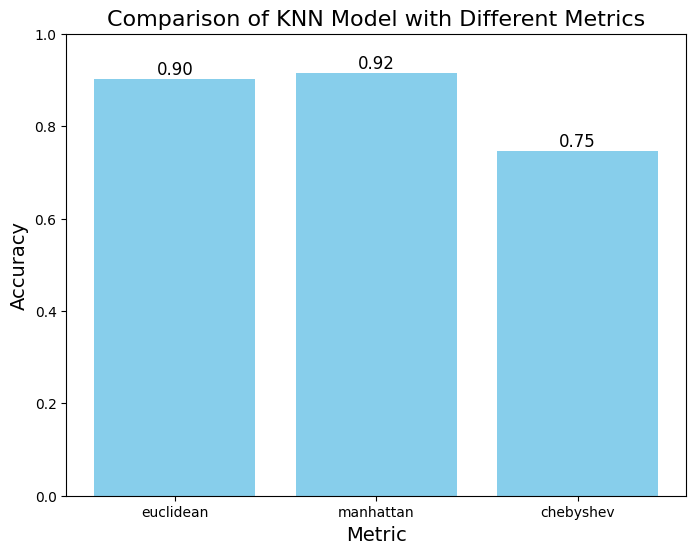

In [54]:
metrics = ["euclidean", "manhattan", "chebyshev"]
accuracies = []
for metric in metrics:
  accuracies.append(accuracy_score(test_y, knn_results[metric]))
plt.figure(figsize=(8, 6))
plt.bar(metrics, accuracies, color='skyblue')
plt.xlabel('Metric', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Comparison of KNN Model with Different Metrics', fontsize=16)
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=12)
plt.show()

In [43]:
target_names = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']

print('Gaussian')
print(classification_report(test_y, bayes_results['gaussian'], target_names=target_names))
print('Bernoulli')
print(classification_report(test_y, bayes_results['bernoulli'], target_names=target_names))

Gaussian
                    precision    recall  f1-score   support

           Walking       0.82      0.84      0.83       496
  Walking Upstairs       0.76      0.96      0.84       471
Walking Downstairs       0.83      0.61      0.70       420
           Sitting       0.58      0.75      0.65       491
          Standing       0.80      0.86      0.83       532
            Laying       0.96      0.60      0.74       537

          accuracy                           0.77      2947
         macro avg       0.79      0.77      0.77      2947
      weighted avg       0.79      0.77      0.77      2947

Bernoulli
                    precision    recall  f1-score   support

           Walking       0.75      0.91      0.82       496
  Walking Upstairs       0.83      0.89      0.86       471
Walking Downstairs       0.85      0.59      0.70       420
           Sitting       0.88      0.75      0.81       491
          Standing       0.80      0.90      0.85       532
            Layin

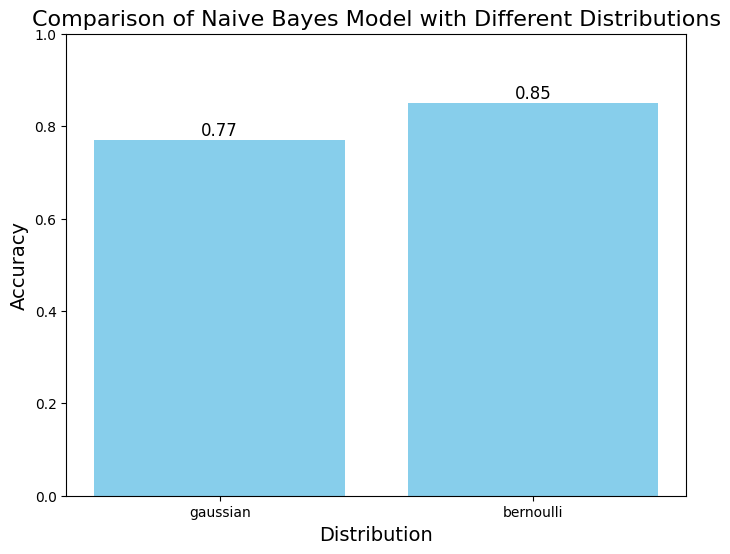

In [48]:
distributions = ["gaussian", "bernoulli"]
accuracies = []
for distribution in distributions:
  accuracies.append(accuracy_score(test_y, bayes_results[distribution]))
plt.figure(figsize=(8, 6))
plt.bar(distributions, accuracies, color='skyblue')
plt.xlabel('Distribution', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Comparison of Naive Bayes Model with Different Distributions', fontsize=16)
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=12)
plt.show()

In [46]:
target_names = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']

print('Linear')
print(classification_report(test_y, svm_results['linear'], target_names=target_names))
print('RBF')
print(classification_report(test_y, svm_results['rbf'], target_names=target_names))

Linear
                    precision    recall  f1-score   support

           Walking       0.96      0.99      0.97       496
  Walking Upstairs       0.98      0.96      0.97       471
Walking Downstairs       0.99      0.98      0.98       420
           Sitting       0.96      0.89      0.92       491
          Standing       0.91      0.97      0.94       532
            Laying       1.00      1.00      1.00       537

          accuracy                           0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

RBF
                    precision    recall  f1-score   support

           Walking       0.94      0.98      0.96       496
  Walking Upstairs       0.93      0.96      0.94       471
Walking Downstairs       0.99      0.91      0.95       420
           Sitting       0.94      0.89      0.91       491
          Standing       0.91      0.95      0.93       532
            Laying       

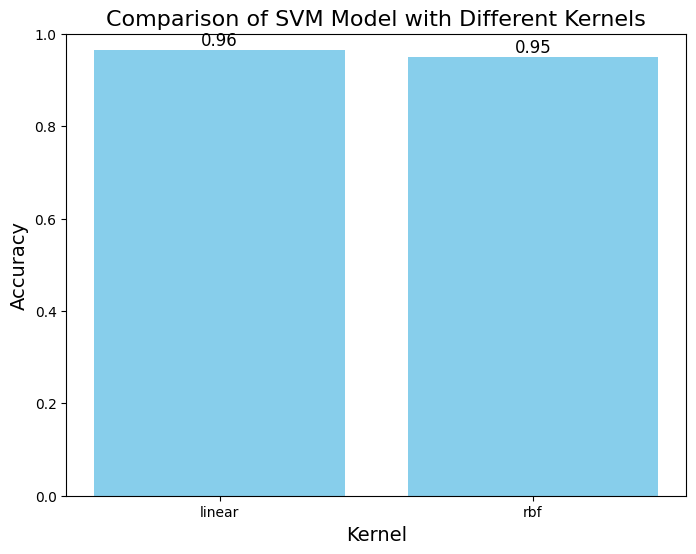

In [47]:
kernels = ["linear", "rbf"]
accuracies = []
for kernel in kernels:
  accuracies.append(accuracy_score(test_y, svm_results[kernel]))
plt.figure(figsize=(8, 6))
plt.bar(kernels, accuracies, color='skyblue')
plt.xlabel('Kernel', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Comparison of SVM Model with Different Kernels', fontsize=16)
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=12)
plt.show()

Получили лучшую точность от моделей класса SVM. При этом модель SVM с гиперпараметром `kernel=linear` показала наибольшую точность (96%)